In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import joblib

2025-06-23 16:29:38.342382: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-23 16:29:38.371572: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-23 16:29:38.371608: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-23 16:29:38.371625: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-23 16:29:38.377754: I tensorflow/core/platform/cpu_feature_g

In [2]:
# 모델 파일 로드
model = tf.keras.models.load_model('/home/user/workdir/CMAQ_Emulator/main/src/model/o3_prediction/yearly_prediction_model_O3')
scaler = joblib.load('/home/user/workdir/CMAQ_Emulator/main/o3_training/yearly_mean_of_O3.pkl')

# 추론 배치 데이터
batch_size = 16

# 배치 별 랜덤 데이터 생성: control matrix, shape (batch_size, 17x5)
ctrl_data = (np.random.rand(batch_size, 17*5) + 0.5)

# 추론 입력 데이터: (batch_size, 17x5)
inputs = [ctrl_data]

2025-06-23 16:29:40.964974: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1023 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:19:00.0, compute capability: 8.6
2025-06-23 16:29:40.966614: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 21236 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2025-06-23 16:29:40.968050: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 21236 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:67:00.0, compute capability: 8.6
2025-06-23 16:29:40.969553: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 21049 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090,

In [3]:
# 추론 결과 데이터: (batch_size, 82x67x1)
tf.profiler.experimental.start('/home/user/workdir/CMAQ_Emulator/main/logs')  
y_preds = model.predict(inputs, batch_size)
outputs = scaler.inverse_transform(y_preds.reshape(batch_size, -1))
outputs = outputs.reshape(y_preds.shape)
tf.profiler.experimental.stop()

2025-06-23 16:29:44.086873: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-06-23 16:29:44.086919: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2025-06-23 16:29:44.086962: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1694] Profiler found 4 GPUs
2025-06-23 16:29:44.734464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2025-06-23 16:29:44.795257: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 1s 1s/step


2025-06-23 16:29:45.629026: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2025-06-23 16:29:45.629690: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1828] CUPTI activity buffer flushed
2025-06-23 16:29:45.691827: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuTracer has collected 12112 callback api events and 8578 activity events. 
2025-06-23 16:29:45.779764: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2025-06-23 16:29:45.780887: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: /home/user/workdir/CMAQ_Emulator/main/logs/plugins/profile/2025_06_23_16_29_45/user1.xplane.pb


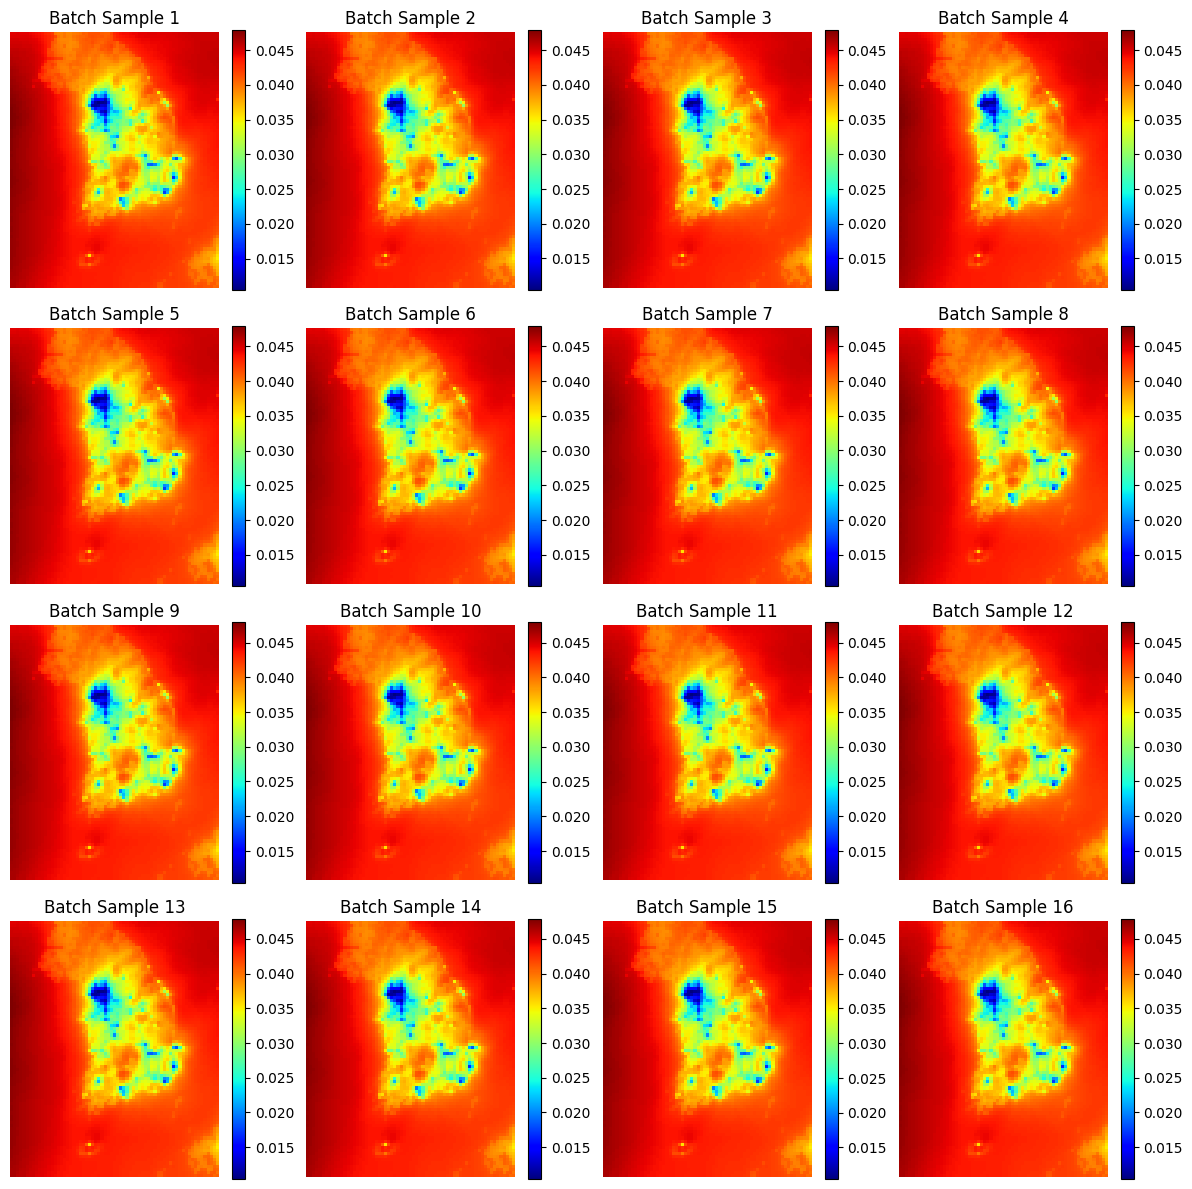

In [4]:
# batch_size개 샘플에 대한 예측 결과 시각화
plt.figure(figsize=(12, 12))
for i in range(batch_size):
    plt.subplot(4, 4, i + 1)
    plt.imshow(outputs[i, :, :, 0][::-1], cmap='jet')
    plt.title(f'Batch Sample {i+1}')
    plt.axis('off')
    plt.colorbar()
plt.tight_layout()